In [1]:
import statsmodels.api as sm

In [2]:
vcm = pd.read_csv('./data/AMF_US-Vcm_BASE-BADM_4-1/AMF_US-Vcm_BASE_HH_4-1.csv', skiprows=2,na_values=-9999)

In [3]:
def make_dt(dt):
    dt = str(dt)

    YYYY = dt[0:4]
    MM = dt[4:6]
    DD = dt[6:8]
    HH = dt[8:10]
    mm = dt[10:12]

    return '%s-%s-%s %s:%s'%(YYYY,MM,DD,HH,mm)
    

In [4]:
vcm.index = pd.DatetimeIndex(vcm.TIMESTAMP_START.map(make_dt))

In [5]:
def precip(P):
    if P > 0:
        return 1
    if P == 0:
        return 0
    

In [6]:
vcm['precip'] = vcm.P.map(precip)

In [7]:
vcm = vcm[['SW_IN','RH','precip','P','LW_IN']]

In [8]:
vcm.dropna(inplace=True)

In [40]:
def logit_bootstrap(n):
    '''Bootstrap function that pulls n observations, n/2 have a positive result and n/2 have a negative result.'''
    
    tmp1 = vcm.loc[vcm.precip==1].copy()
    tmp2 = vcm.loc[vcm.precip==0].copy()
    
    idx1 = np.random.randint(0,len(tmp1),n)
    idx2 = np.random.randint(0,len(tmp2),n)
    
    tmp = pd.concat([tmp1.iloc[idx1],tmp2.iloc[idx2]])
    
    mod = sm.formula.logit('precip ~ SW_IN + RH + LW_IN', tmp).fit(disp=0)
    
    return mod.prsquared,mod.params['SW_IN'],mod.params,mod.params['RH'],mod.params['Intercept']
    

In [50]:
vcm.index.min()

Timestamp('2010-10-07 15:30:00')

In [41]:
m = 1000
n = 1000
df = pd.DataFrame({'n':np.repeat(n,m)})

In [42]:
res = df.n.map(logit_bootstrap)

In [46]:
r2,sw_in,rh,inter = zip(*res)

In [47]:
df['r2'] = r2
df['SW_IN'] = sw_in
df['RH'] = rh
df['intercept'] = inter

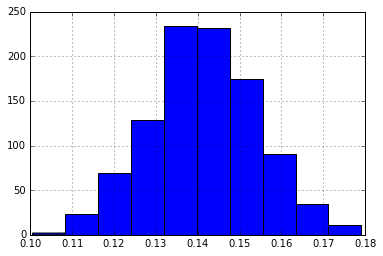

In [49]:
df.r2.hist()

In [ ]:
vcm.append()

In [ ]:


for i in m:
    
    # subset the data frame
    

In [161]:
vcm.precip.sum()

1091.0

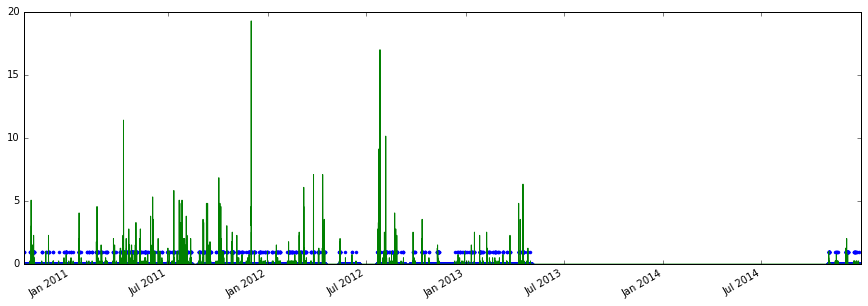

In [167]:
plt.figure(figsize=(15,5))
vcm.precip.plot(marker = '.',ls='none')
vcm.P.plot()

In [38]:
datmax = vcm.index.max()

In [39]:
zob = pd.read_pickle('./data/Jemez_upper.pcl')

In [40]:
datmin = zob.index.min()

In [41]:
zob = zob[datmin:datmax]

In [42]:
vcm = vcm[datmin:datmax]

In [56]:
vcm['datetime'] = vcm.index

In [59]:
zob['datetime'] = zob.index

In [142]:
df = pd.merge(left=zob,right=vcm,on='datetime')

In [144]:
df['precip_x'] = df.P_x.map(precip)

In [145]:
df['precip_y'] = df.P_y.map(precip)

In [146]:
df = df[['SW_IN','RH_y','precip_x','precip_y','P_x','LW_IN']]
df.columns = ['SW','RH','precip_x','precip_y','P','LW']
df.dropna(inplace=True)

In [147]:
df.precip_y.sum()

506.0

In [148]:
df.precip_x.sum()

537

In [100]:
df.columns

Index([u'BatteryVoltage', u'AT', u'RH_x', u'WindSpeed', u'WindDirection',
       u'WindSTD', u'NetRadiation', u'P_x', u'Rain_Duration', u'datetime',
       u'TIMESTAMP_START', u'TIMESTAMP_END', u'USTAR', u'TA', u'WD', u'WS',
       u'NEE_PI', u'FC', u'SC', u'H', u'SH', u'LE', u'SLE', u'G', u'TS_1',
       u'TS_2', u'P_y', u'RH_y', u'PA', u'CO2_1', u'CO2_2', u'VPD_PI',
       u'SWC_1', u'SWC_2', u'NETRAD', u'PPFD_IN', u'SW_IN', u'SW_DIF',
       u'PPFD_OUT', u'SW_OUT', u'LW_IN', u'LW_OUT', u'H2O', u'RECO_PI',
       u'APAR', u'PPFD_DIF', u'FAPAR', u'ZL', u'precip'],
      dtype='object')

In [101]:
df = df[['SW_IN','RH_y','precip','P_x','LW_IN']]

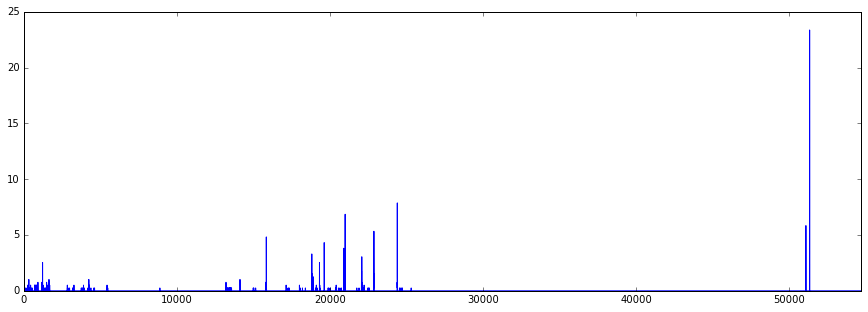

In [120]:
plt.figure(figsize=(15,5))
df.P.plot()

In [10]:
mod = sm.formula.logit('precip ~ SW_IN + RH + 1', vcm).fit()

Optimization terminated successfully.
         Current function value: 0.111302
         Iterations 9


In [12]:
mod.params

Intercept   -6.123143
SW_IN        0.002089
RH           0.034830
dtype: float64

In [13]:
mod.prsquared

0.085002521955544363

In [11]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 precip   No. Observations:                41480
Model:                          Logit   Df Residuals:                    41477
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Sep 2016   Pseudo R-squ.:                 0.08500
Time:                        14:40:43   Log-Likelihood:                -4616.8
converged:                       True   LL-Null:                       -5045.7
                                        LLR p-value:                5.394e-187
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.1231      0.110    -55.711      0.000        -6.339    -5.908
SW_IN          0.0021   9.69e-05     21.566      0.000         0.002     0.002
RH             0.0348      0.001     25.729      0.000         0.032     0.037
==============================================================================
"""

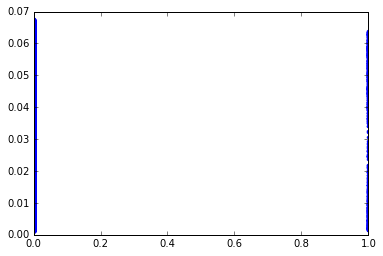

In [123]:
plt.plot(df.precip,mod.predict(df[['RH','LW']]),'.')

In [129]:
len(df)-df.precip.sum()

37060

In [124]:
df['prob'] = mod.predict(df[['RH','LW']])

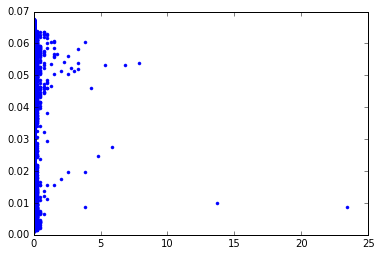

In [126]:
plt.plot(df.P,df.prob,'.')